<a href="https://colab.research.google.com/github/CFathurrohman/Machine_learning/blob/main/Week4/ML_W4_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧿 **Praktikum 1**

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from ipywidgets import interact, fixed

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

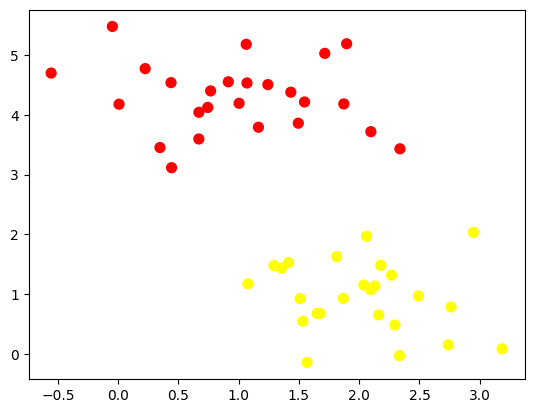

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

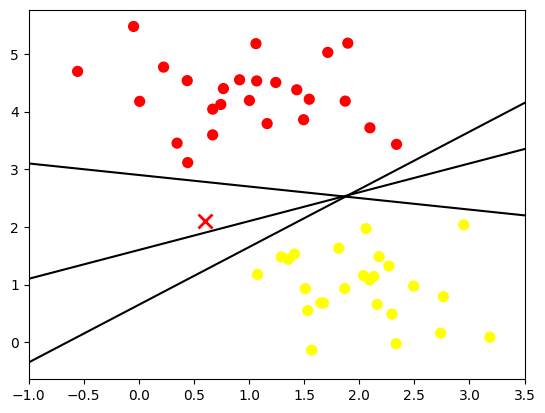

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

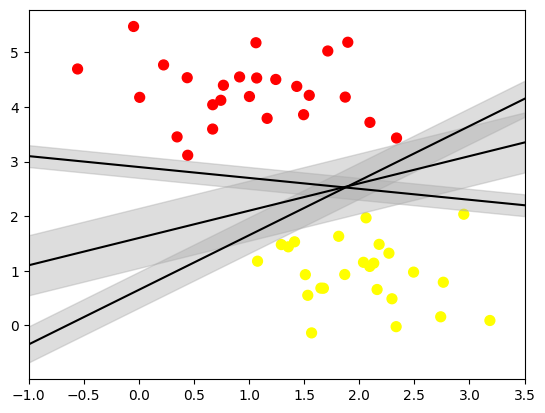

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

Penerappan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

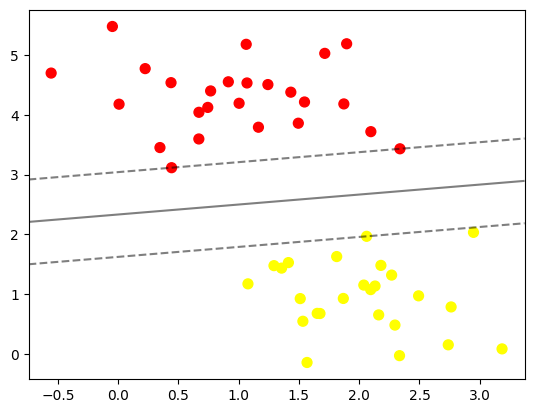

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

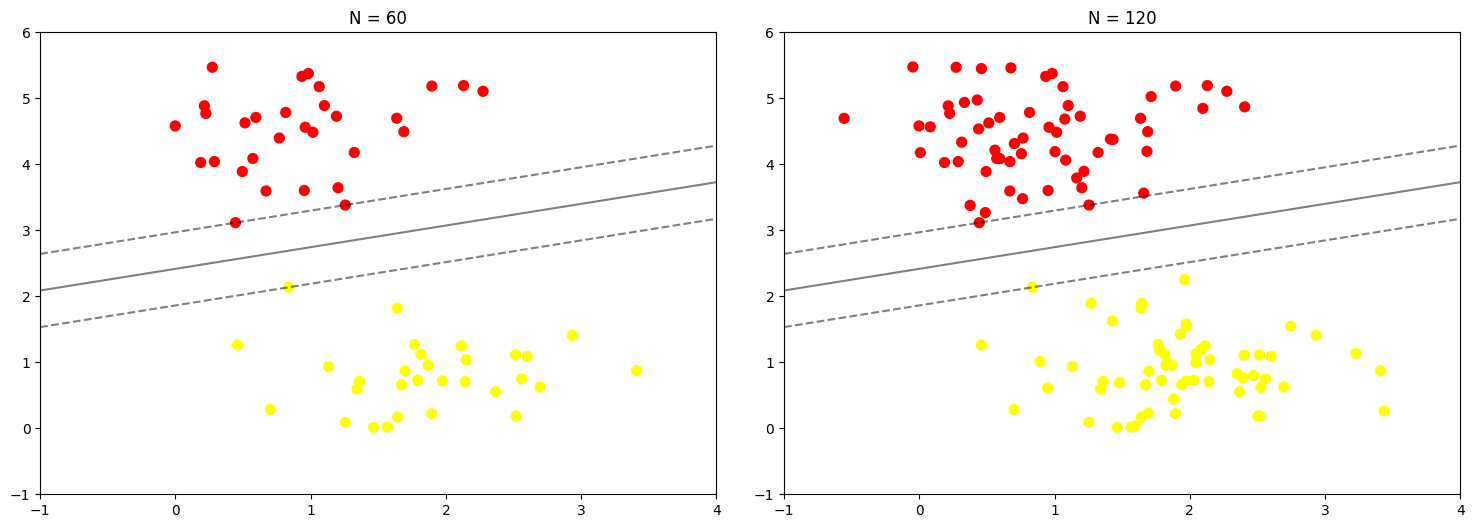

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Data Tidak Terpisah Secara Linier**<br>
Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.



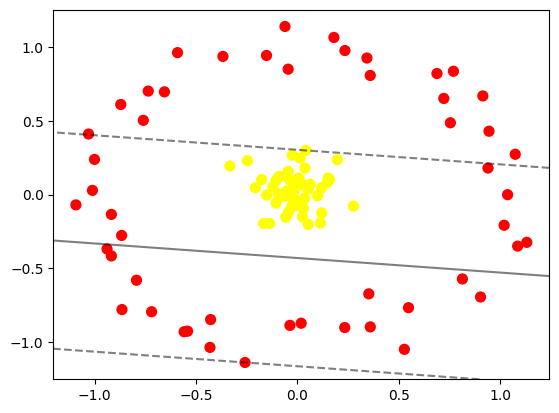

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.



In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.12937896e-01, -1.93045780e-01],
       [-9.43432349e-02,  5.02145298e-03],
       [ 7.53836703e-01,  4.86703954e-01],
       [ 6.48724848e-03, -4.47383999e-02],
       [ 3.42375469e-01,  9.25835441e-01],
       [-2.49910258e-02,  7.30769806e-02],
       [-3.98706638e-02,  1.02129256e-01],
       [ 3.58739851e-01,  8.07644243e-01],
       [-2.47069002e-01,  2.29555881e-01],
       [-1.05880081e-01, -5.67698555e-02],
       [-2.58866968e-02, -2.49197004e-02],
       [-7.19425408e-01, -7.94384453e-01],
       [-1.20988580e-01,  5.34705404e-02],
       [-5.91523423e-01,  9.62444578e-01],
       [-9.17812703e-01, -4.16123638e-01],
       [ 7.68928180e-01,  8.35949596e-01],
       [-5.47205291e-02,  2.20731430e-02],
       [-4.28343262e-01, -8.47545450e-01],
       [-1.88062653e-02,  1.84397375e-02],
       [-1.66912530e-01, -1.96096763e-01],
       [ 1.25671669e-02,  2.47487616e-01],
       [ 3.45103031e-02, -2.49558306e-02],
       [ 3.05013044e-02, -3.11950129e-02],
       [ 1.81390637e-02, -8.72128137e-01],
       [ 1.18134960e-01,  4.51734642e-02],
       [ 1.03599109e+00, -7.13812993e-04],
       [-3.67602740e-01,  9.36842746e-01],
       [ 3.70297545e-02,  1.78994582e-01],
       [-1.52718120e-01,  9.43350876e-01],
       [-7.93719056e-01, -5.80704013e-01],
       [-1.15629704e-04, -4.58277923e-02],
       [ 6.26557300e-02,  7.01643216e-02],
       [-8.65351694e-01, -7.79649140e-01],
       [ 1.57965404e-01,  1.02743474e-01],
       [ 4.52801410e-03,  6.57801788e-02],
       [-4.61650367e-02,  1.57473003e-01],
       [-4.31520581e-01, -1.03612125e+00],
       [-4.60683306e-02,  8.50276920e-01],
       [ 1.18000552e-02,  6.82584456e-02],
       [ 3.33682556e-02,  6.36528505e-02],
       [ 5.47224739e-01, -7.66871775e-01],
       [-9.17648060e-01, -1.34465704e-01],
       [ 3.51617170e-01, -6.73083377e-01],
       [-1.76550048e-01,  1.02030622e-01],
       [-7.60143813e-01,  5.03403778e-01],
       [ 5.60723693e-03,  1.12375706e-01],
       [ 9.94272049e-02, -7.62305692e-03],
       [ 9.39268081e-01,  1.79887297e-01],
       [ 1.19351590e-01, -1.24694607e-01],
       [ 9.02490439e-01, -6.94416868e-01],
       [ 7.21370855e-01,  6.51776329e-01],
       [ 1.46714787e-01,  8.10845469e-02],
       [ 1.51113159e-01,  1.12206105e-01],
       [ 4.04997170e-02,  2.99496440e-01],
       [-2.07803224e-01,  4.67318707e-02],
       [ 1.13058130e+00, -3.23806403e-01],
       [-1.00089967e+00,  2.38467604e-01],
       [-1.51910608e-01, -2.77453898e-03],
       [ 8.13067970e-01, -5.72029127e-01],
       [ 5.28557823e-02, -2.02034292e-01],
       [-1.09259945e+00, -6.97868391e-02],
       [ 1.01881076e+00, -2.07869987e-01],
       [ 9.13822914e-01,  6.68797950e-01],
       [-6.55979265e-01,  6.96476743e-01],
       [-8.67195145e-01, -2.77067227e-01],
       [-6.17231565e-02,  1.13976317e+00],
       [ 2.32877028e-01, -9.01486828e-01],
       [ 2.95978904e-02, -9.64843515e-02],
       [-9.07021993e-02,  1.23195103e-01],
       [ 1.79509395e-01,  1.06535598e+00],
       [ 2.75485867e-01, -7.84991515e-02],
       [-3.73389244e-02, -8.86811611e-01],
       [-2.97515021e-02, -8.35762703e-02],
       [ 1.07357826e+00,  2.73319297e-01],
       [ 9.44226754e-01,  4.29648725e-01],
       [ 1.08548389e+00, -3.49449524e-01],
       [ 5.10598549e-02,  3.66902280e-02],
       [-7.35932045e-01,  7.01799325e-01],
       [-1.01098003e+00,  2.84968832e-02],
       [-5.58940089e-01, -9.29948549e-01],
       [-6.52619161e-02, -1.20334719e-02],
       [-5.77018878e-02, -1.53636908e-01],
       [-1.36936276e-01, -1.95885423e-01],
       [-5.41898148e-01, -9.26119680e-01],
       [-1.03013220e+00,  4.10618723e-01],
       [ 5.44321450e-02,  4.50954508e-02],
       [-1.05091586e-01,  9.77827273e-02],
       [ 3.58839376e-01, -8.97163306e-01],
       [-4.50928558e-02, -1.19013458e-01],
       [-2.58656608e-01, -1.13842999e+00],
       [ 1.96602844e-01,  2.36258224e-01],
       [ 2.33983912e-01,  9.76759122e-01

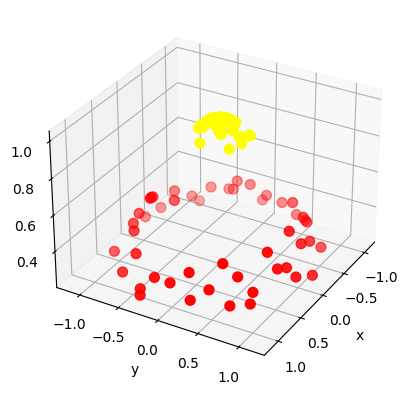

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))


walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

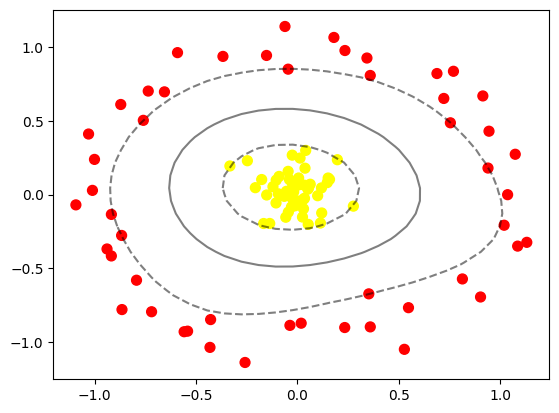

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Data Overlap

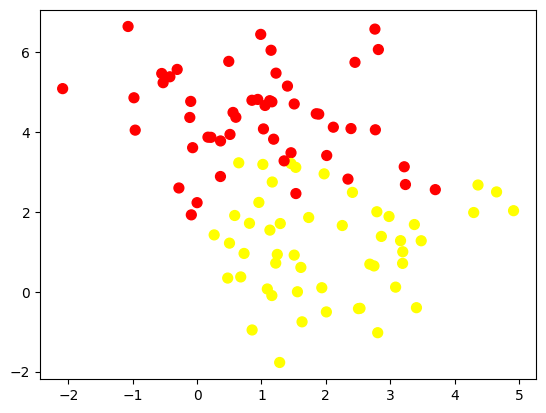

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

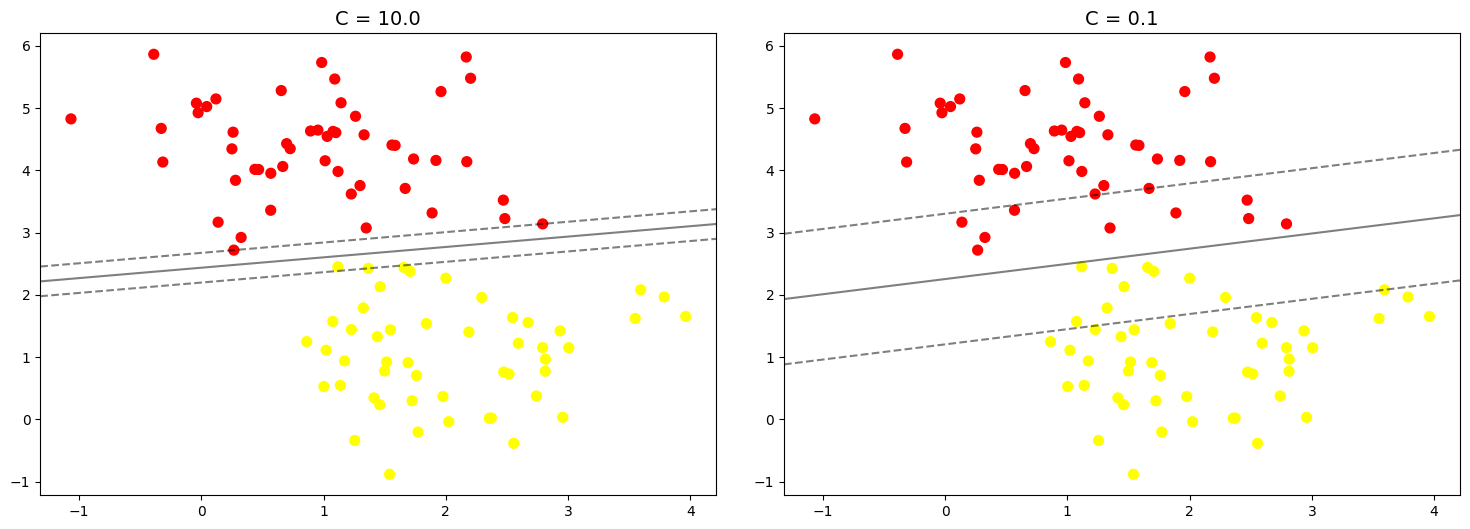

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)